발표자료: ppt/pdf (10page 내외)
코드는 필수 아님.
데이터 소개
전처리?
딥러닝 모형 구조(레이어, 활성함수, 분류/회귀)
모형 학습 결과(성능지표:  accuracy, recall, precision, RMSE(회귀), 등등)
그 외 나는 이런거 했다. 이런게 잘 안되더라
포트폴리오 준비 필요하다하는 경우 발표해도 상관 없음. (이런 내용으로 하고 싶다던지.-> 현업에서의 피드백이 올 수 있음)

>모델을 직접 만든다면 : optimizer = optim.SGD([W,b], lr=0.01)
>
>nn.Linear 등 으로 모델을 만들때는: optimizer = optim.SGD(model.parameters(), lr = 0.01)

## 3주차 NeuralNet/DNN

> 인공신경망(NeuralNet)
> 
>    퍼셉트론 -> 다층 퍼셉트론(NeuralNet의 초기버전) -> 기타

> 퍼셉트론
>
> 여러 신호들이 각각의 가중치를 갖고 총 합이 계산되며(weighted sum), 출력값이 임계값($\theta$)을 넘는다면 1, 넘지 못하면 0으로(step function 활성함수의 예시) 계산됨.
> 
> 퍼셉트론을 이용해 풀 수 없는 문제: XOR
> 

AND

$\space$ 1 (0.5$x_1$ + 0.5$x_2$ >= 0.7)

$\space$ 0 (0.5$x_1$ + 0.5$x_2$ <>=> 0.7)


NAND

$\space$ 1 (0.5$x_1$ + 0.5$x_2$ < 0.7)

$\space$ 0 (0.5$x_1$ + 0.5$x_2$ >= 0.7)


OR

$\space$ 1 (0.5$x_1$ + 0.5$x_2$ > 0)

$\space$ 0 (0.5$x_1$ + 0.5$x_2$ <=0)



XOR
-> 선형함수 하나로만은 해결이 안됨.



### NeuralNet

$\space$ $a$ = $b$ + $w_1x_1$ + $w_2x_2$

$\space$ y = $h(a) \space\space:활성함수 $ 

$\space\space\space\space\space
y = \begin{cases}
0 \space\space\space\space if\space\space h(a)< \theta  \\
1 \space\space\space\space if\space\space h(a) >= \theta
\end{cases}
$

$
o = f(x)\space\space:출력함수 
$

>출력함수의 형태는 출력값에 따라 sigmoid일수도, softmax일수도

sigmoid 함수는 

>장점:
>
>   0에서 1사이의 어떠한 값도 나올 수 있다. (출력이 연속적)
>
>   0근처에서도 출력값이 매끄러움.
>
> 단점: 
> 
>   기울기 소실 문제 (y 값이 0에서 1사이의 범위.)
>
>   y 값이 0으로 갈수록 기울기 소실 문제의 극복 
>   
> -> tanh는 값이 -1에서 1의 범위이므로.
>
> RelU는 연산이 단순.
>
> -> Leeky ReLU 
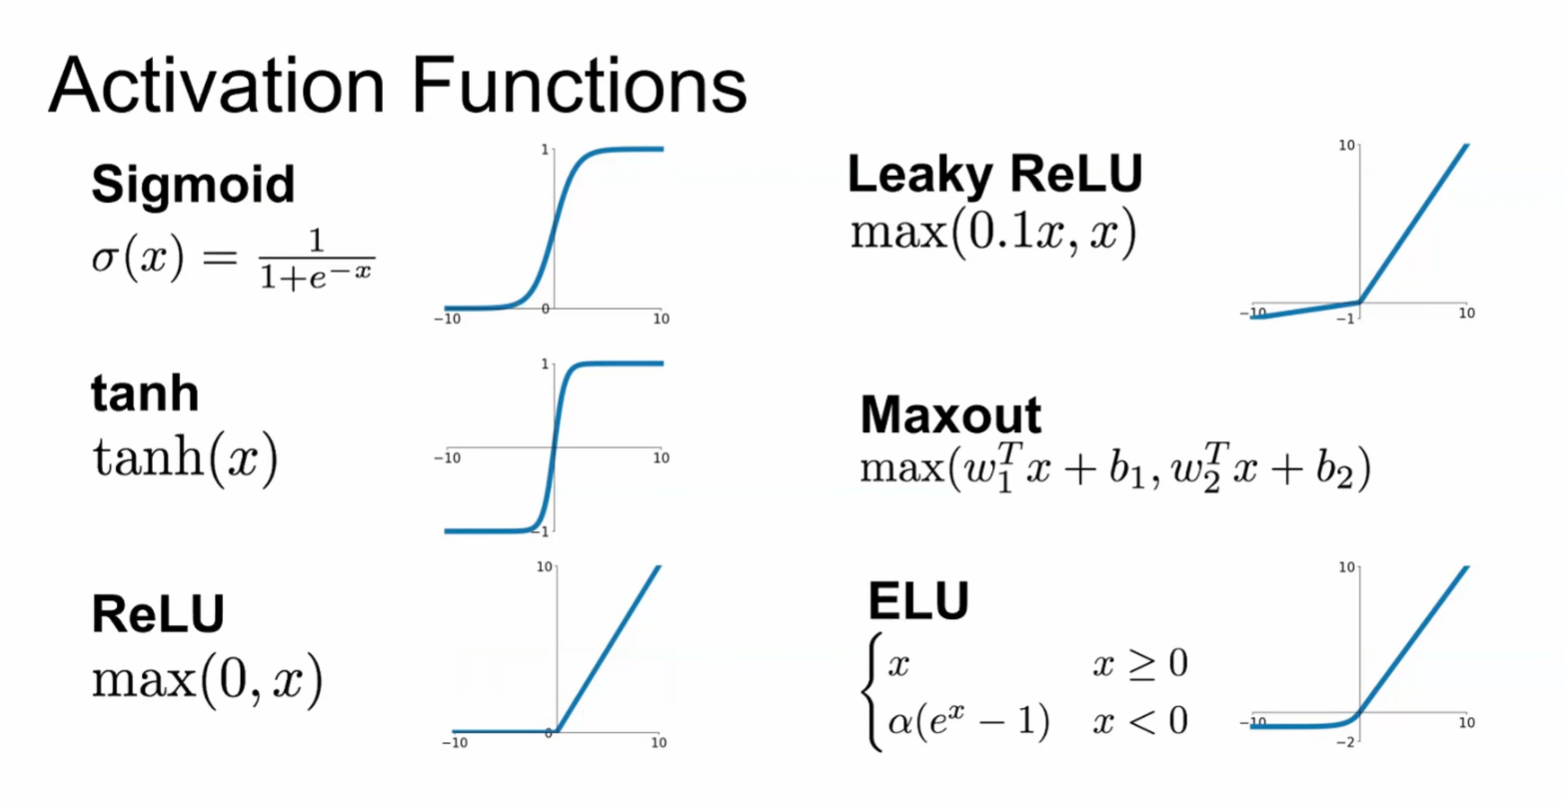


### XOR 문제

In [1]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [3]:
X = torch.FloatTensor([[0,0], [0,1],[1,0],[1,1]]).to(device)
Y = torch.FloatTensor([[0],[1],[1],[0]]).to(device)

In [4]:
linear = nn.Linear(2,1,bias=True)
sigmoid = nn.Sigmoid()
model = nn.Sequential(linear, 
                      sigmoid).to(device)

In [5]:
loss_fn = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)

In [6]:
def train_model(epoch):
    for step in range(epoch):
        pred = model(X) # 모델이 gradient 계산함
        cost = loss_fn(pred, Y) # cost는 모든 loss의 합 같은 개념
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        if step % 1000 ==0:
            print(step, cost.item())

In [7]:
train_model(10001)

0 0.8081977367401123
1000 0.6931471824645996
2000 0.6931471824645996
3000 0.6931471824645996
4000 0.6931471824645996
5000 0.6931471824645996
6000 0.6931471824645996
7000 0.6931471824645996
8000 0.6931471824645996
9000 0.6931471824645996
10000 0.6931471824645996


In [8]:
# 퍼셉트론의 구현. (XOR이 해결되지 않음)
def evaluation():
    model.eval() # 예측할 때는 forward만 수행
    with torch.no_grad(): #gradient라는 과정은 컴퓨팅 파워를 많이 필요로 하므로. 
        pred = model(X) # 확률값이 나온다. 
        predicted = (pred>0.5).float() # 나온 확률값이 0.5보다 크면 1, 아니면 0 (예측값)
        accuracy = (predicted==Y).float().mean() # Y는 실제값(target), predicted는 예측값. 같다면 True = 1(float으로 바꾸면), 다르다면 False =0 -> 평균값
        print('모델의 출력값(Hypothesis):', pred.detach().cpu().numpy()) # detach().cpu() -> GPU에 있던 것을 cpu로 보냄. (numpy가 cpu에 있어서.)
        print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
        print('실제값(Y): ', Y.cpu().numpy())
        print('정확도(Accuracy): ', accuracy.item())

In [9]:
evaluation()

모델의 출력값(Hypothesis): [[0.5]
 [0.5]
 [0.5]
 [0.5]]
모델의 예측값(Predicted):  [[0.]
 [0.]
 [0.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  0.5


### DNN으로 XOR문제 해결하기

In [10]:
# 인풋2개를 받아 10개로 출력 -> sigmoid연결 -> 10개를 받아 10개 출력 -> 연결 -> 10개를 받아 10개 출력 -> 연결 -> 10개를 받아 최종 1개 출력 -> 최종 sigmoid
model = nn.Sequential(nn.Linear(2,10), 
                      nn.Sigmoid(),
                      nn.Linear(10,10),
                      nn.Sigmoid(),
                      nn.Linear(10,10),
                      nn.Sigmoid(),
                      nn.Linear(10,1),
                      nn.Sigmoid()
).to(device)

In [11]:
loss_fn = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)

In [12]:
train_model(10001)

0 0.693164587020874
1000 0.6931487321853638
2000 0.6931322813034058
3000 0.6931036710739136
4000 0.6930221319198608
5000 0.6924059391021729
6000 0.003637222573161125
7000 0.0006056362763047218
8000 0.0003151239361613989
9000 0.00021013875084463507
10000 0.00015662376245018095


In [13]:
evaluation()

#0.00013, 0.9998, 0.99988, 0.000159
# 0, 1, 1,0 

모델의 출력값(Hypothesis): [[1.1759413e-04]
 [9.9984789e-01]
 [9.9985671e-01]
 [2.1336388e-04]]
모델의 예측값(Predicted):  [[0.]
 [1.]
 [1.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  1.0


In [14]:
#step =10000
step =999
step%1000==0

#range(10000) # 0에서 9999까지

False

### 과제

In [15]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 데이터 로드
iris = load_iris()
X, y = iris.data, iris.target

# 데이터 프레임으로 변환
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] =y

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 텐서로 변환
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.int64)
y_test_tensor = torch.tensor(y_test, dtype=torch.int64)

# 데이터 로더 생성
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)



클래스>nn.Sequential로 바꾸기 or  클래스 구조 바꾸기 (네트워크 바꾸기)

In [16]:
class IrisNet(nn.Module):
    def __init__(self):
        super(IrisNet, self).__init__()
        self.fc1 = nn.Linear(4, 50)
        self.fc2 = nn.Linear(50, 3) # loss가 softmax형태로 출력 -> 따로 softmax를 출력 층에 써 주진 않았다.
        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x    
    
model = IrisNet()

In [17]:
model = nn.Sequential(nn.Linear(4, 50),
                      nn.ReLU(),
                      nn.Linear(50, 50),
                      nn.ReLU(),
                      nn.Linear(50, 60),
                      nn.Sigmoid(),
                      nn.Linear(60, 4),
                      nn.Sigmoid(),
                      nn.Linear(4, 3),
                      nn.ReLU()
                      ).to(device)

In [18]:
criterion =nn.CrossEntropyLoss().to(device) # loss가 softmax형태로 출력 -> 따로 softmax를 출력 층에 써 주진 않았다.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# 학습 과정
epochs = 10000
for epoch in range(epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        inputs = inputs.to(device)  
        labels = labels.to(device) 
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
    if (epoch+1) % 1000 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item(): .4f}')

Epoch 1000/10000, Loss:  0.6867
Epoch 2000/10000, Loss:  0.5494
Epoch 3000/10000, Loss:  0.6866
Epoch 4000/10000, Loss:  0.6866
Epoch 5000/10000, Loss:  0.5493
Epoch 6000/10000, Loss:  0.8240
Epoch 7000/10000, Loss:  0.6866
Epoch 8000/10000, Loss:  0.8240
Epoch 9000/10000, Loss:  0.5493
Epoch 10000/10000, Loss:  0.9613


### MNIST Over Fitting

- 적은 양의 데이터만 사용하여 오버피팅 재현

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import numpy as np
import matplotlib.pyplot as plt


In [20]:
 #데이터셋 로드 및 전처리
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])


# MNIST 데이터셋 로드
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform) # train true -> train data
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform) # train false -> test data

기본적인 이미지 데이터 구조. 
- 색상이 있는 경우, RGB의 3개 채널.
- 흑백인 MNIST의 경우 1개 채널임.

    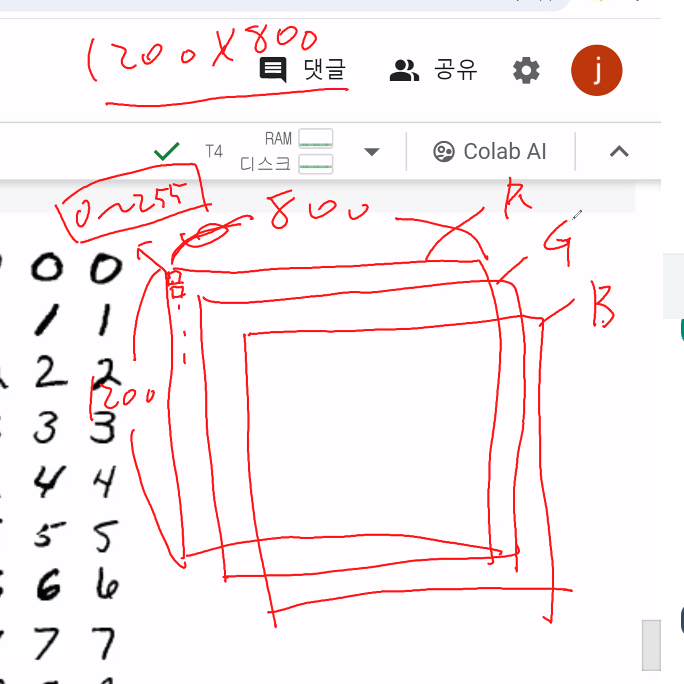

In [21]:
train_data[0] # 0번째 데이터의 구조. 28개의 array가 있다. (28*28)

(tensor([[[-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000, -1.0000,
           -1.0000, -1.0000, -1.000

In [22]:
# 트레이닝 샘플 크기를 의도적으로 줄임
num_samples = 100 # 100개의 샘플만 사용
subset_indices = np.random.choice(len(train_data), num_samples, replace=False) # 비복원 추출
train_subset = Subset(train_data, subset_indices)

# 데이터 로더 설정
train_loader = DataLoader(train_subset, batch_size=10)
test_loader = DataLoader(test_data, batch_size=10)

In [23]:
len(test_loader)

1000

In [24]:
class DeepNet(nn.Module):
    def __init__(self):
        super(DeepNet, self).__init__()
        self.layers =nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256,10)
        )
    
    def forward(self, x):
        x = x.view(x.size(0), -1) # (1, 28*28의 linear한 구조로 만듦)
        return self.layers(x)



In [25]:
# 모델 초기화
model = DeepNet()

# 손실 함수 및 옵티마이저
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [26]:
# 학습 함수
def train(model, criterion, optimizer, loader):
    model.train()
    for data, target in loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

# 평가 함수
def evaluate(model, loader):
    model.eval()
    total_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in loader:
            output = model(data)
            total_loss += criterion(output, target).item()
            pred = output.argmax(dim=1)
            correct += pred.eq(target.view_as(pred)).sum().item() # 정확도를 epoch만큼 쌓는다.
    return total_loss / len(loader.dataset), correct / len(loader.dataset)

def train_test(model, criterion, optimizer, train_loader, test_loader):

  train_losses = []
  test_losses = []
  train_acces = []
  test_acces = []
  # 학습 및 평가
  for epoch in range(50):
      train(model, criterion, optimizer, train_loader)
      train_loss, train_acc = evaluate(model, train_loader)
      test_loss, test_acc = evaluate(model, test_loader)
      train_losses.append(train_loss)
      test_losses.append(test_loss)
      train_acces.append(train_acc)
      test_acces.append(test_acc)
      print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}')

  return train_losses, test_losses, train_acces, test_acces


In [27]:
def plot_acc(train_acces, test_acces):
  plt.plot(train_acces, label='train_acc')
  plt.plot(test_acces, label='test_acc')
  plt.xlabel('Epoch')
  plt.ylabel('acc')
  plt.title('Training and Test acc')
  plt.legend()
  plt.show()

In [28]:
def plot_loss(train_losses, test_losses):
  plt.plot(train_losses, label='Training Loss')
  plt.plot(test_losses, label='Test Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title('Training and Test Loss')
  plt.legend()
  plt.show()

Epoch 1, Train Loss: 0.2022, Train Acc: 0.2200, Test Loss: 0.2244, Test Acc: 0.1214
Epoch 2, Train Loss: 0.1746, Train Acc: 0.4200, Test Loss: 0.1997, Test Acc: 0.2636
Epoch 3, Train Loss: 0.1519, Train Acc: 0.4800, Test Loss: 0.1906, Test Acc: 0.2937
Epoch 4, Train Loss: 0.1170, Train Acc: 0.6000, Test Loss: 0.1953, Test Acc: 0.4046
Epoch 5, Train Loss: 0.1392, Train Acc: 0.5400, Test Loss: 0.2282, Test Acc: 0.3540
Epoch 6, Train Loss: 0.1157, Train Acc: 0.5700, Test Loss: 0.1721, Test Acc: 0.3929
Epoch 7, Train Loss: 0.0650, Train Acc: 0.7300, Test Loss: 0.1587, Test Acc: 0.4887
Epoch 8, Train Loss: 0.0834, Train Acc: 0.7100, Test Loss: 0.1941, Test Acc: 0.4990
Epoch 9, Train Loss: 0.0366, Train Acc: 0.8500, Test Loss: 0.1522, Test Acc: 0.5717
Epoch 10, Train Loss: 0.0577, Train Acc: 0.7800, Test Loss: 0.1932, Test Acc: 0.5072
Epoch 11, Train Loss: 0.0549, Train Acc: 0.7900, Test Loss: 0.1589, Test Acc: 0.5460
Epoch 12, Train Loss: 0.0356, Train Acc: 0.8200, Test Loss: 0.1516, Test A

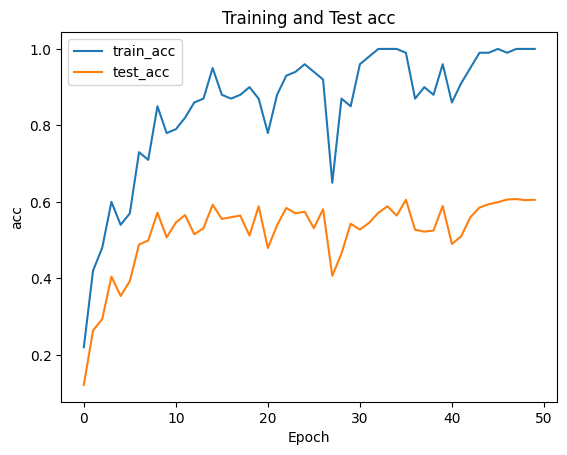

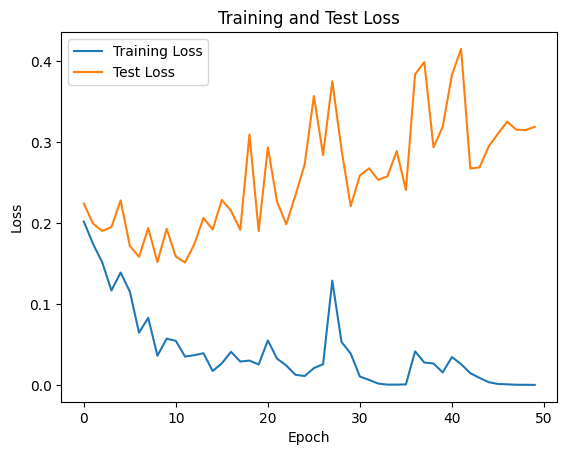

In [29]:
train_losses, test_losses, train_acces, test_acces = train_test(model, criterion, optimizer, train_loader, test_loader)
plot_acc(train_acces, test_acces)
plot_loss(train_losses, test_losses) #전형적인  over fitting

### Regularization  

In [30]:
model = DeepNet()
optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5) # torch는 L2만 있음


Epoch 1, Train Loss: 0.2145, Train Acc: 0.3200, Test Loss: 0.2454, Test Acc: 0.1775
Epoch 2, Train Loss: 0.1796, Train Acc: 0.3700, Test Loss: 0.2093, Test Acc: 0.2433
Epoch 3, Train Loss: 0.1526, Train Acc: 0.4200, Test Loss: 0.1918, Test Acc: 0.2719
Epoch 4, Train Loss: 0.1524, Train Acc: 0.3700, Test Loss: 0.2058, Test Acc: 0.2567
Epoch 5, Train Loss: 0.1584, Train Acc: 0.4100, Test Loss: 0.2368, Test Acc: 0.2711
Epoch 6, Train Loss: 0.0975, Train Acc: 0.5600, Test Loss: 0.1586, Test Acc: 0.3758
Epoch 7, Train Loss: 0.0914, Train Acc: 0.5900, Test Loss: 0.1413, Test Acc: 0.4570
Epoch 8, Train Loss: 0.0678, Train Acc: 0.6700, Test Loss: 0.1327, Test Acc: 0.4648
Epoch 9, Train Loss: 0.0642, Train Acc: 0.7100, Test Loss: 0.1620, Test Acc: 0.4818
Epoch 10, Train Loss: 0.0515, Train Acc: 0.8000, Test Loss: 0.1451, Test Acc: 0.5393
Epoch 11, Train Loss: 0.0545, Train Acc: 0.7500, Test Loss: 0.1701, Test Acc: 0.5269
Epoch 12, Train Loss: 0.0405, Train Acc: 0.8000, Test Loss: 0.1461, Test A

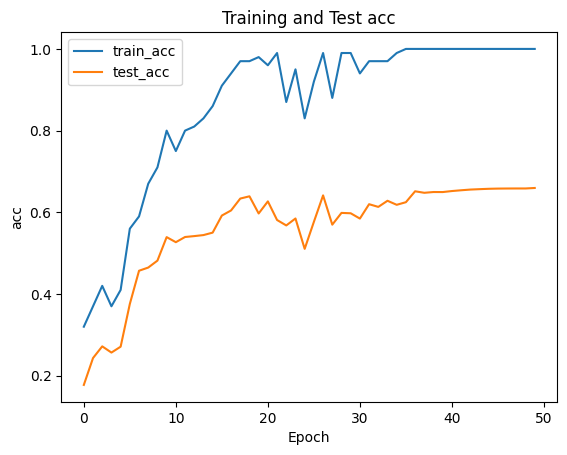

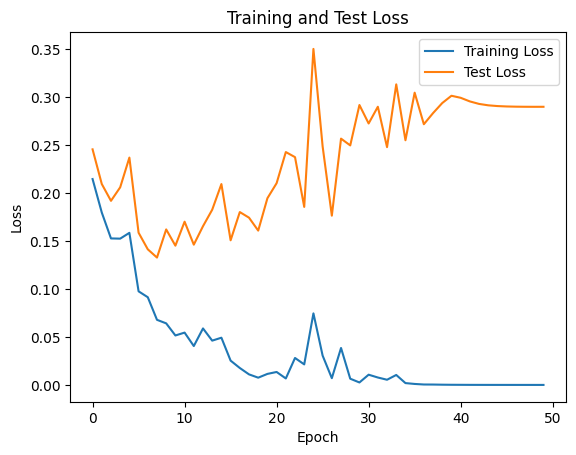

In [31]:
train_losses, test_losses, train_acces, test_acces = train_test(model, criterion, optimizer, train_loader, test_loader)
plot_acc(train_acces, test_acces)
plot_loss(train_losses, test_losses)

### Drop-Out

In [32]:
class DeepNet(nn.Module):
    def __init__(self):
        super(DeepNet, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)
        return self.layers(x)


In [33]:
model = DeepNet()
optimizer = optim.Adam(model.parameters(), lr=0.01) # torch는 L2만 있음

weight decay + dropout

Epoch 1, Train Loss: 0.2269, Train Acc: 0.1300, Test Loss: 0.2285, Test Acc: 0.1032
Epoch 2, Train Loss: 0.1796, Train Acc: 0.2900, Test Loss: 0.2066, Test Acc: 0.1900
Epoch 3, Train Loss: 0.1644, Train Acc: 0.3900, Test Loss: 0.1990, Test Acc: 0.2413
Epoch 4, Train Loss: 0.1669, Train Acc: 0.3800, Test Loss: 0.2271, Test Acc: 0.2767
Epoch 5, Train Loss: 0.1530, Train Acc: 0.4100, Test Loss: 0.1945, Test Acc: 0.2386
Epoch 6, Train Loss: 0.1601, Train Acc: 0.3500, Test Loss: 0.1935, Test Acc: 0.2640
Epoch 7, Train Loss: 0.1401, Train Acc: 0.4300, Test Loss: 0.2006, Test Acc: 0.3170
Epoch 8, Train Loss: 0.1776, Train Acc: 0.4400, Test Loss: 0.2070, Test Acc: 0.3215
Epoch 9, Train Loss: 0.1348, Train Acc: 0.5100, Test Loss: 0.1859, Test Acc: 0.3432
Epoch 10, Train Loss: 0.1190, Train Acc: 0.5000, Test Loss: 0.1681, Test Acc: 0.3895
Epoch 11, Train Loss: 0.1214, Train Acc: 0.5000, Test Loss: 0.1810, Test Acc: 0.3511
Epoch 12, Train Loss: 0.1342, Train Acc: 0.5200, Test Loss: 0.1995, Test A

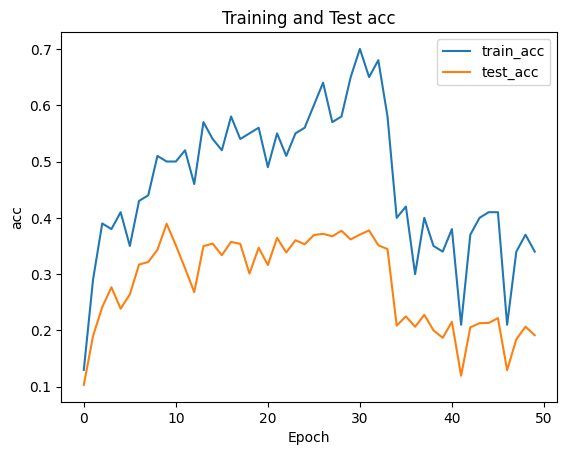

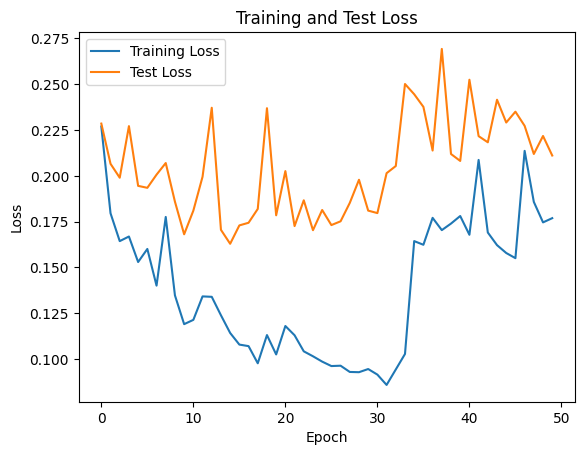

In [34]:
train_losses, test_losses, train_acces, test_acces = train_test(model, criterion, optimizer, train_loader, test_loader)
plot_acc(train_acces, test_acces)
plot_loss(train_losses, test_losses) # loss의 차이가 조금 줄었다.

## Batch Normalization

- ```covariate shift?```
    - Covariate Shift란 모델의 입력 분포가 학습 중에 변하는 경우를 가리킵니다. 예를 들어, 이미지 분류 작업을 수행하는 모델을 학습할 때, 학습 데이터의 분포와 테스트 데이터의 분포가 다를 수 있습니다. 이는 훈련된 모델이 새로운 데이터에 대해 일반화되기 어렵게 만들 수 있습니다.

- ```Batch Normalization```
    - covariate shift를 줄이는 데 도움이 됩니다. 이 기술은 각 미니배치의 입력 데이터를 정규화하여 네트워크 내에서 안정성을 높이고 학습 속도를 향상시킵니다. Batch Normalization은 각 미니배치의 입력을 평균과 분산으로 정규화합니다. 그 결과로 입력 분포의 평균과 분산이 학습 중에 안정적으로 유지됩니다.

    - 하지만 학습 데이터와 테스트 데이터의 분포가 다를 때, Batch Normalization은 covariate shift를 완전히 제거하지는 못합니다. 이는 테스트 데이터에 대해 적용할 때 일어날 수 있는 문제입니다. 따라서 테스트 데이터에 대해 Batch Normalization을 적용할 때는 훈련 데이터의 분포를 기반으로 정규화된 평균과 분산을 사용하는데, 이는 테스트 데이터의 분포에 대한 일부 정보를 반영하지 못할 수 있습니다.

    - 요약하면, covariate shift란 입력 데이터의 분포가 학습 중에 변하는 현상을 말하며, Batch Normalization은 이를 완전히 제거하지는 못하지만 학습 속도를 향상시키고 안정성을 높이는 데 도움이 됩니다.

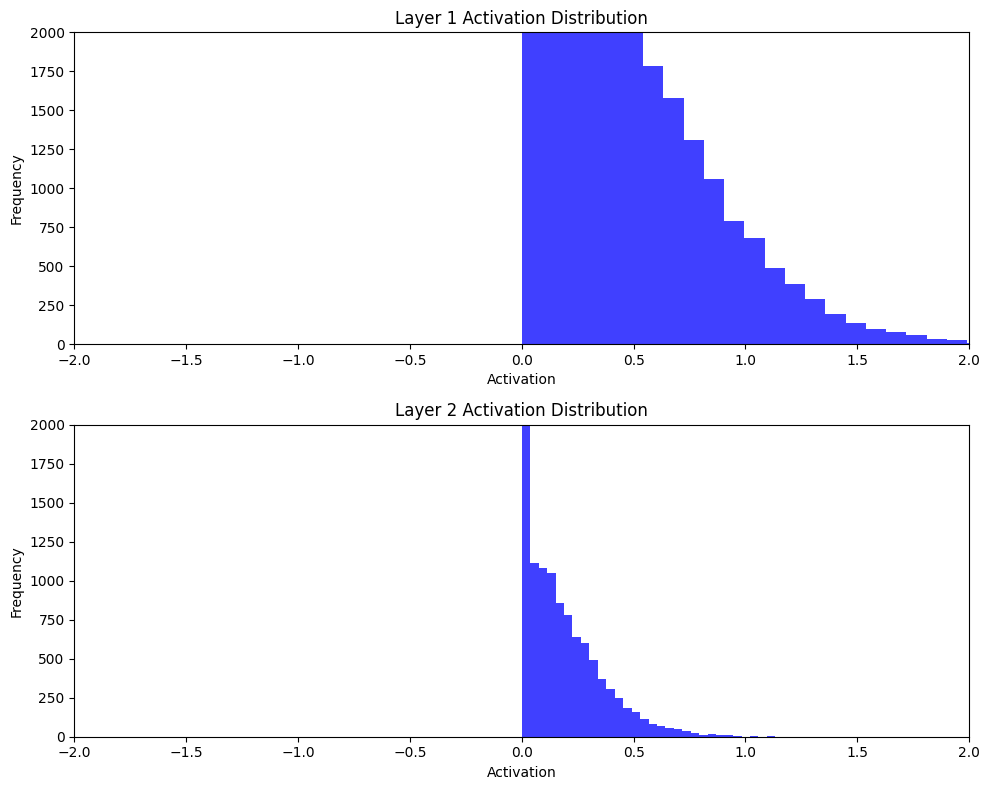

In [35]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# 데이터 생성
data = torch.randn(1000, 10)  # 표준 정규 분포에서 1000개의 10차원 데이터 샘플 생성

# 간단한 신경망 정의
class SimpleNetwork(nn.Module):
    def __init__(self):
        super(SimpleNetwork, self).__init__()
        self.fc1 = nn.Linear(10, 50)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(50, 20)
        self.relu2 = nn.ReLU()

    def forward(self, x):
        activations = []
        x = self.fc1(x)
        x = self.relu1(x)
        activations.append(x)
        x = self.fc2(x)
        x = self.relu2(x)
        activations.append(x)
        return activations

# 신경망 초기화
net = SimpleNetwork()

# 활성화 수집
activations = net(data)

# 각 레이어의 활성화 분포를 히스토그램으로 그리기
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
for i, activation in enumerate(activations):
    axes[i].hist(activation.detach().numpy().flatten(), bins=30, alpha=0.75, color='b')
    axes[i].set_title(f'Layer {i+1} Activation Distribution')
    axes[i].set_xlim([-2, 2])
    axes[i].set_ylim([0, 2000])
    axes[i].set_xlabel('Activation')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Early Stopping

In [36]:
# Early Stopping 구현

# train과 validation의 차이가 어느정도 이하가 될 때 (minimum loss), 학습을 멈춘다.                  -> test loss 기준.
# loss가 최소일때의 값을 저장해두었다가, 몇 차례 후의 loss가 연속적으로 해당 값보다 크면, 학습을 멈춘다.   
# patientce: 몇 번 까지 loss가 커진 것을 허용할 것인지. min_delta: 최소 loss와의 차이가 이보다 작으면, count하지 않음 (buffer)
class EarlyStopping:
    def __init__(self, patience=5, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = np.inf
        self.early_stop = False
# 실행할 때마다 counter가 하나씩 늘어남.
# call은 기존의 저장된 내용을 불러오는 것.
    def __call__(self, val_loss):
        if val_loss < self.best_loss - self.min_delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True

In [37]:
class DeepNet(nn.Module):
    def __init__(self):
        super(DeepNet, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(256, 256),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(256, 10)
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)
        return self.layers(x)

In [38]:
def train_test(model, criterion, optimizer, train_loader, test_loader, early_stopping):

  train_losses = []
  test_losses = []
  train_acces = []
  test_acces = []
  # 학습 및 평가
  for epoch in range(50):
      train(model, criterion, optimizer, train_loader)
      train_loss, train_acc = evaluate(model, train_loader)
      test_loss, test_acc = evaluate(model, test_loader)

      train_losses.append(train_loss)
      test_losses.append(test_loss)
      train_acces.append(train_acc)
      test_acces.append(test_acc)
      print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}')

      early_stopping(test_loss) # 이 부분만 제외하고, 나머지는 같다.
      if early_stopping.early_stop:
        print('Early Stopping')
        break



  return train_losses, test_losses, train_acces, test_acces

In [39]:
model = DeepNet()
optimizer = optim.Adam(model.parameters(), lr=0.01)

Epoch 1, Train Loss: 0.2365, Train Acc: 0.1400, Test Loss: 0.2543, Test Acc: 0.0892
Epoch 2, Train Loss: 0.2034, Train Acc: 0.2700, Test Loss: 0.2179, Test Acc: 0.1936
Epoch 3, Train Loss: 0.1783, Train Acc: 0.3900, Test Loss: 0.2024, Test Acc: 0.2680
Epoch 4, Train Loss: 0.1527, Train Acc: 0.4800, Test Loss: 0.1855, Test Acc: 0.3129
Epoch 5, Train Loss: 0.1469, Train Acc: 0.4400, Test Loss: 0.1889, Test Acc: 0.3410
Epoch 6, Train Loss: 0.1295, Train Acc: 0.5200, Test Loss: 0.1730, Test Acc: 0.3594
Epoch 7, Train Loss: 0.1373, Train Acc: 0.5100, Test Loss: 0.1878, Test Acc: 0.3753
Epoch 8, Train Loss: 0.1644, Train Acc: 0.4000, Test Loss: 0.2013, Test Acc: 0.2424
Epoch 9, Train Loss: 0.1098, Train Acc: 0.6100, Test Loss: 0.1706, Test Acc: 0.4085
Early Stopping


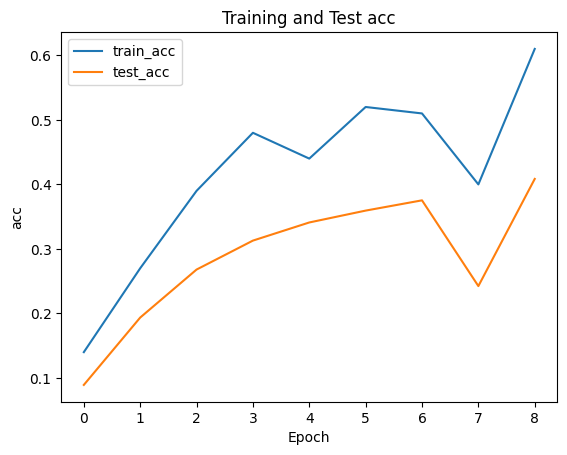

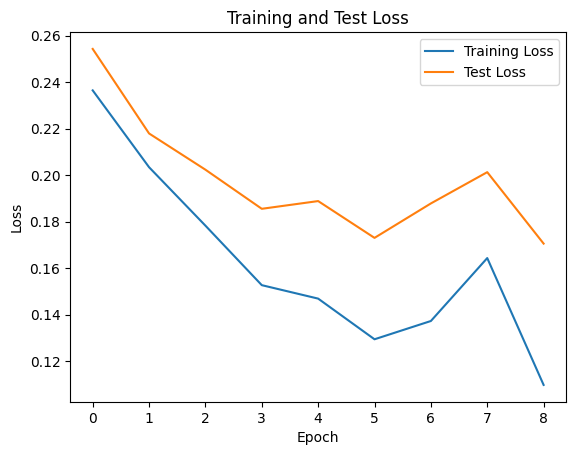

In [40]:
early_stopping = EarlyStopping(patience=3, min_delta=0.01) 
train_losses, test_losses, train_acces, test_acces = train_test(model, criterion, optimizer, train_loader, test_loader,early_stopping)
plot_acc(train_acces, test_acces)
plot_loss(train_losses, test_losses)

## Momentum

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 샘플 함수 생성: f(x) = x^4 - 4x^3 + 4x^2
x = np.linspace(-1, 3, 400)
y = x**4 - 4*x**3 + 3*x**2

# 그래프 생성
plt.figure(figsize=(8, 5))
plt.plot(x, y, label='f(x) = x^4 - 4x^3 + 4x^2')
plt.title("Example of Local Minimum and Global Minimum")
plt.xlabel("x")
plt.ylabel("f(x)")

# 극소값과 극대값 표시
minima_x = [0, 2]
minima_y = [0**4 - 4*0**3 + 4*0**2, 2**4 - 4*2**3 + 3*2**2]
plt.scatter(minima_x, minima_y, color='red', s=100, label='Global Minima')
plt.scatter([0], [minima_y[0]], color='green', s=50, label='Local Minimum')

plt.legend()
plt.grid(True)
plt.show()

